# "Unveiling Insights: A Data-Driven Exploration of Restaurants"

** LEVEL-3 **

# Data Cleaning

In [1]:
#Importing important libraries and csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from wordcloud import WordCloud
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
#Dealing the null-values in Cuisines using mode
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


* I have successfully completed all operations in Level-1. Here, I focused on handling all empty cells before diving straight into Level-2 tasks.

# Task 1: Restaurant Reviews
* Analyze the text reviews to identify the most common positive and negative keywords.
* Calculate the average length of reviews and explore if there is a relationship between review length and rating.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Most Common Positive Keywords: [('good', 3179), ('excellent', 301)]
Most Common Negative Keywords: [('average', 3737), ('poor', 186)]


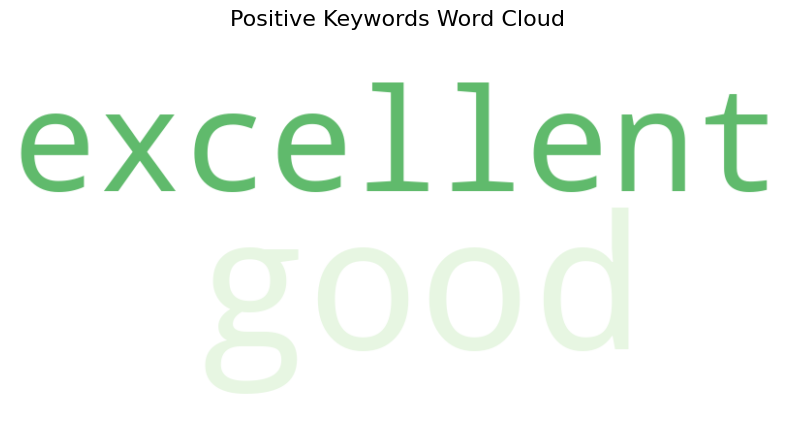

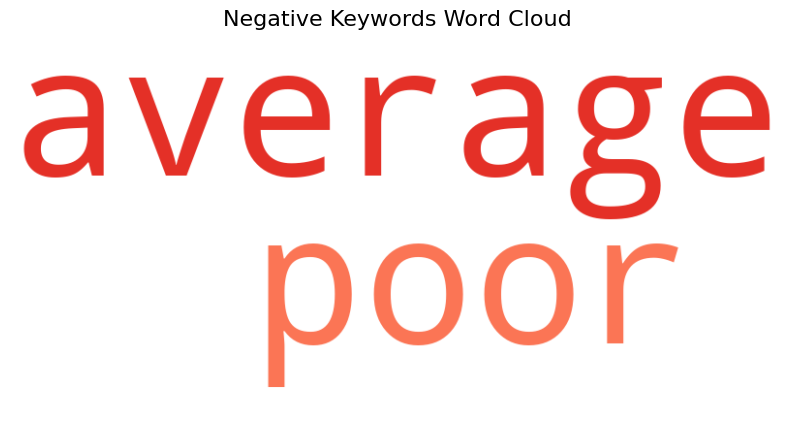

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
#Download the 'punkt_tab' data package
nltk.download('punkt_tab')

#Preprocess the reviews
def preprocess_reviews(reviews):
    reviews = reviews.str.lower()  #Convert to lowercase
    reviews = reviews.str.replace(r'[^\w\s]', '', regex=True) # Remove unnecessary characters
    stop_words = set(stopwords.words('english'))  # Tokenize and remove stopwords
    tokenized_reviews = reviews.apply(nltk.word_tokenize)
    cleaned_reviews = tokenized_reviews.apply(lambda x: [word for word in x if word not in stop_words])
    return cleaned_reviews

#Apply preprocessing
cleaned_reviews = preprocess_reviews(df['Rating text'])

#Sentiment Analysis
positive_words = []
negative_words = []

for review in cleaned_reviews:
    for word in review:
        sentiment = TextBlob(word).sentiment.polarity
        if sentiment > 0:  # Positive word
            positive_words.append(word)
        elif sentiment < 0:  # Negative word
            negative_words.append(word)

#Count the most common positive and negative words
positive_counts = Counter(positive_words).most_common(10)
negative_counts = Counter(negative_words).most_common(10)

print("Most Common Positive Keywords:", positive_counts)
print("Most Common Negative Keywords:", negative_counts)

#Visualize using WordCloud
def plot_wordcloud(word_list, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(' '.join(word_list))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

#Plot positive keywords
plot_wordcloud([word for word, count in positive_counts], "Positive Keywords Word Cloud", 'Greens')

#Plot negative keywords
plot_wordcloud([word for word, count in negative_counts], "Negative Keywords Word Cloud", 'Reds')

Average Review Length: 7.02 characters

Average Review Length by Rating:
Aggregate rating
0.0    9.0
1.8    4.0
1.9    4.0
2.0    4.0
2.1    4.0
2.2    4.0
2.3    4.0
2.4    4.0
2.5    7.0
2.6    7.0
2.7    7.0
2.8    7.0
2.9    7.0
3.0    7.0
3.1    7.0
3.2    7.0
3.3    7.0
3.4    7.0
3.5    4.0
3.6    4.0
3.7    4.0
3.8    4.0
3.9    4.0
4.0    9.0
4.1    9.0
4.2    9.0
4.3    9.0
4.4    9.0
4.5    9.0
4.6    9.0
4.7    9.0
4.8    9.0
4.9    9.0
Name: Review_Length, dtype: float64


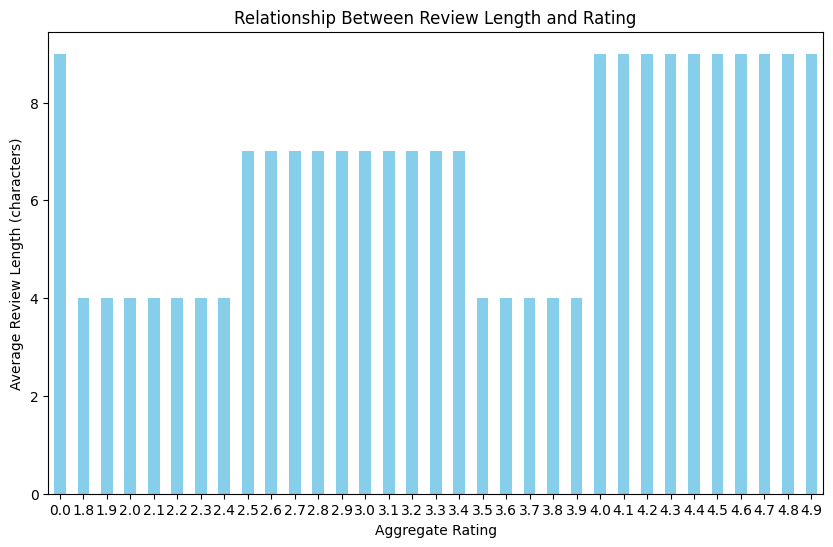

In [4]:
#Calculate the length of each review
df['Review_Length'] = df['Rating text'].apply(lambda x: len(str(x)))

#Calculate the avg_review length
average_review_length = df['Review_Length'].mean()
print(f"Average Review Length: {average_review_length:.2f} characters")

#Analyze the relationship between review length and rating
rating_review_length = df.groupby('Aggregate rating')['Review_Length'].mean()

#Display the average review length per rating
print("\nAverage Review Length by Rating:")
print(rating_review_length)

#Visualization
plt.figure(figsize=(10, 6))
rating_review_length.plot(kind='bar', color='skyblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Review Length (characters)')
plt.title('Relationship Between Review Length and Rating')
plt.xticks(rotation=0)
plt.show()

# Task 2: Votes Analysis
* Identify the restaurants with the highest and lowest number of votes.
* Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [5]:
#Identify the restaurant with the highest number of votes
max_votes = df['Votes'].max()
restaurant_highest_votes = df[df['Votes'] == max_votes]

#Identify the restaurant with the lowest number of votes
min_votes = df['Votes'].min()
restaurant_lowest_votes = df[df['Votes'] == min_votes]

#Display the output
print("Restaurant with the highest number of votes:")
print(restaurant_highest_votes[['Restaurant Name', 'Votes', 'City']])

print("\nRestaurant with the lowest number of votes:")
print(restaurant_lowest_votes[['Restaurant Name', 'Votes', 'City']])

Restaurant with the highest number of votes:
    Restaurant Name  Votes       City
728            Toit  10934  Bangalore

Restaurant with the lowest number of votes:
                 Restaurant Name  Votes        City
69              Cantinho da Gula      0  S��o Paulo
874                The Chaiwalas      0   Faridabad
879           Fusion Food Corner      0   Faridabad
880                Punjabi Rasoi      0   Faridabad
887                Baskin Robbin      0   Faridabad
...                          ...    ...         ...
9044               6 Packs Momos      0       Noida
9098                   Cafe' Wow      0       Noida
9099  Chef's Basket Pop Up Caf��      0       Noida
9103            The Hangout-Deli      0       Noida
9111                    Platters      0       Noida

[1094 rows x 3 columns]


Correlation between Votes and Aggregate Rating: 0.31


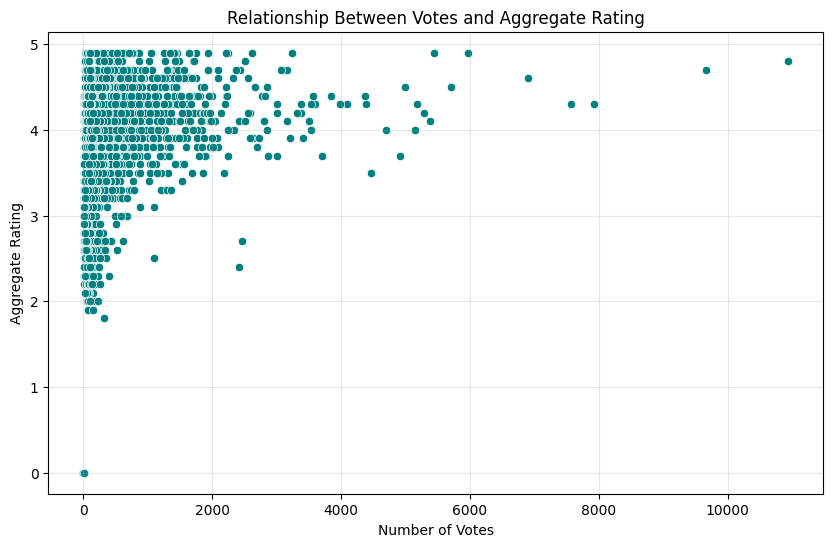

In [6]:
#Calculate the correlation coefficient
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between Votes and Aggregate Rating: {correlation:.2f}")

#Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], color='teal')
plt.title('Relationship Between Votes and Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(alpha=0.3)
plt.show()

# Task 3: Price Range vs. Online Delivery andTable Booking
* Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
* Determine if higher-priced restaurants are more likely to offer these services.

Percentage of Restaurants Offering Online Delivery and Table Booking by Price Range:
             Online Delivery (%)  Table Booking (%)
Price range                                        
1                      15.774077           0.022502
2                      41.310633           7.677482
3                      29.190341          45.738636
4                       9.044369          46.757679


<Figure size 600x400 with 0 Axes>

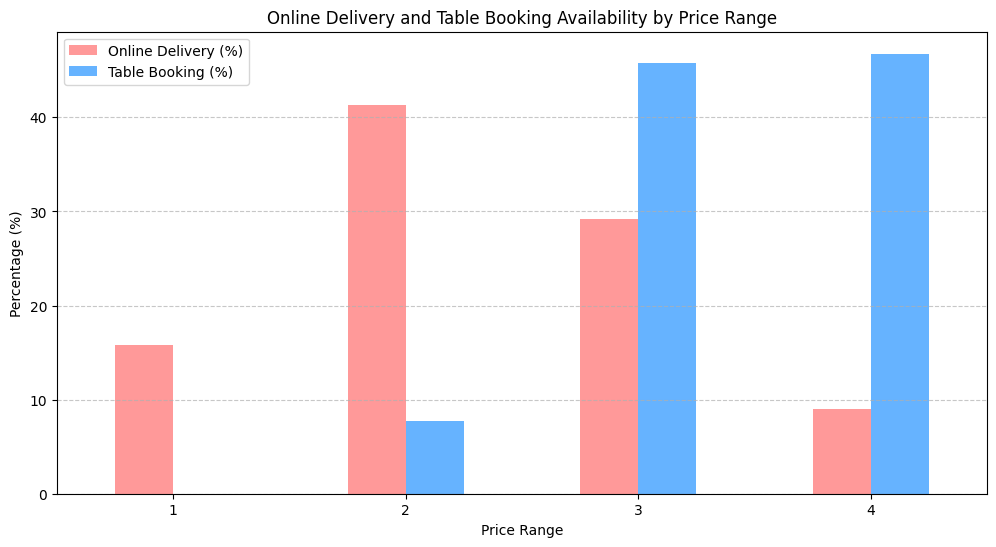

In [7]:
# Calculate the percentage of restaurants offering online delivery and table booking for each price range
delivery_table_stats = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].apply(lambda x: x.replace({'Yes': 1, 'No': 0}).mean()) * 100

#Rename columns for clarity
delivery_table_stats.columns = ['Online Delivery (%)', 'Table Booking (%)']

print("Percentage of Restaurants Offering Online Delivery and Table Booking by Price Range:")
print(delivery_table_stats)

#Plotting
plt.figure(figsize=(6, 4))
delivery_table_stats.plot(kind='bar', figsize=(12, 6), color=['#ff9999', '#66b3ff'])
plt.title('Online Delivery and Table Booking Availability by Price Range')
plt.ylabel('Percentage (%)')
plt.xlabel('Price Range')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Percentage of Services Offered by Price Range:
             Online Delivery (%)  Table Booking (%)
Price range                                        
1                      15.774077           0.022502
2                      41.310633           7.677482
3                      29.190341          45.738636
4                       9.044369          46.757679


<Figure size 1000x600 with 0 Axes>

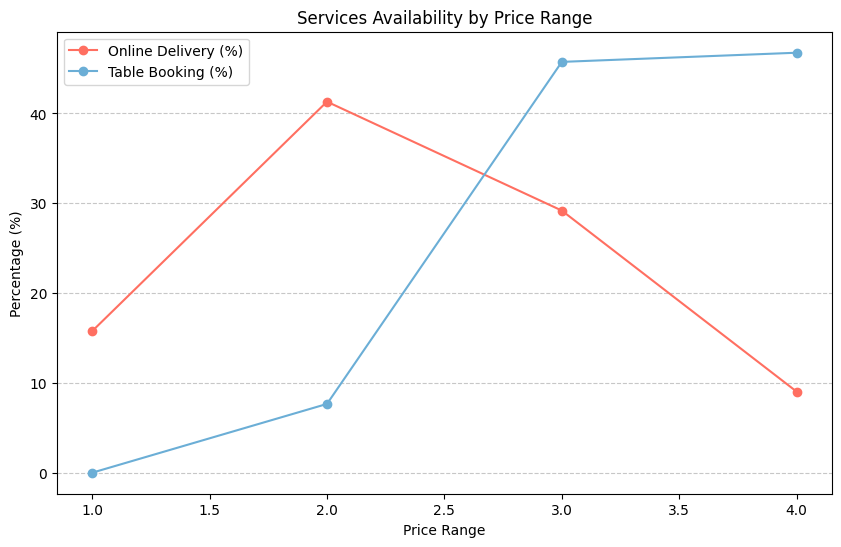

In [8]:
#Calculate the percentage of services offered by price range
price_service_stats = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].apply(lambda x: x.replace({'Yes': 1, 'No': 0}).mean()) * 100
price_service_stats.columns = ['Online Delivery (%)', 'Table Booking (%)']

#Print the statistics
print("Percentage of Services Offered by Price Range:")
print(price_service_stats)

#Visualization
plt.figure(figsize=(10, 6))
price_service_stats.plot(marker='o', figsize=(10, 6), color=['#FF6F61', '#6BAED6'])
plt.title('Services Availability by Price Range')
plt.ylabel('Percentage (%)')
plt.xlabel('Price Range')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.show()

**Thankyou!**